<p align=center style ="font-size:26px;"> 
<b> LAB 10: PROCESAMIENTO DE SEÑALES ECG </b>
 </p>

#### **Tabla de Contenido**  

1. [Introducción](#introduccion)  
2. [Objetivos](#objetivos)  
3. [Materiales](#materiales)  
4. [Procedimiento](#procedimiento)  
5. [Resultados](#resultados)  
6. [Discusión](#discusion)  
7. [Conclusiones](#conclusiones)  
8. [Bibliografía](#bibliografia)  
    






 

 

   

 


 


## Introducción  

## **Objetivos**  

<p align="Jutify">

- Entender como funcionan las librerias `NeuroKit2` y `ecg_plot` (principalmente algunas funciones)
- Emplear las funciones `ecg_clean`,`ecg_process`,`ecg_analyze`,`ecg_plot` de la libreria NeuroKit2  
- Emplear la funcion `ecg_plot_1` de la libreria ecg_plot
- Analizar los parametros de salida que nos brinda ciertas funciones (`nk.ecg_clean`,`nk.ecg_plot`,`ecg.plot.plot_1`, etc)
- Comparar los parámetros de salida de las funciones para cada derivada (DI, DII, DIII) en las actividades de basal, aguantar la respiración 10 segundos y post-ejercicio.
<p>

<table align="center">
    <tr>
        <td align="center"><b>Materiales</b></td>
    </tr>
    <tr>
        <td><b>Señales ECG adquiridas del lab 5</b></td>
    </tr>
    <tr>
        <td><b>Python notebook</b></td>
    </tr>
    <tr>
        <td><b>Librería NeuroKit2</b></td>
    </tr>
    <tr>
        <td><b>Librería ecg_plot</b></td>
    </tr>
    <tr>
        <td><b>Librerías comúnmente utilizadas (matplotlib.pyplot, pandas, numpy, etc.)</b></td>
    </tr>
</table>




## **Procedimiento** 

<p align="justify">

- **Adquisición de las señales de ECG**  
  Se adquieren las señales de ECG utilizando el **BITalino** y el **OpenSignals**. Estas señales se obtuvieron en el laboratorio 5 de este repositorio. Las bioseñales fueron capturadas en tres condiciones: actividad basal, apnea de 10 segundos y post-ejercicio, registrándose en sus respectivas derivadas estándar (DI, DII, DIII).

- **Librerías a utilizar**  
  Para el análisis de la señal de ECG, se utilizaron las librerías **NeuroKit2** y **ecg_plot**.

- **Escalamiento de la señal recién obtenida del BITalino**  
  Los valores de la señal obtenidos del BITalino están en formato digital, con un rango de 0 a 1023. Para convertirlos a milivoltios (mV), que es el formato ideal para el análisis de ECG, se realizó un escalado de la siguiente manera:

  $$
  \frac{\text{Señal a analizar} \times 1.2 \, \text{mV}}{\text{Máximo valor de la señal a analizar}}
  $$

- **Procesamiento de la señal:**
  - Se utiliza la función `ecg_clean` de la librería NeuroKit2 para limpiar la señal escalada, eliminando posibles artefactos.
  
  - Luego, se emplea la función `ecg_process` en la señal limpiada, obteniendo los parámetros `signals` (un DataFrame con la señal filtrada, frecuencia cardíaca, etc.) e `info` (un diccionario con información adicional sobre la señal procesada).

  - La señal es analizada con la función `ecg_analyze`, que proporciona varios parámetros como la variabilidad de la frecuencia cardíaca (HRV) y otros aspectos clínicamente relevantes.

  - Con la función `ecg_plot` de NeuroKit2 (`nk.ecg_plot`), se genera una gráfica de la señal analizada, mostrando parámetros importantes en la visualización.

  - Se realiza un nuevo escalamiento a la señal limpia, análogo al inicial, con el siguiente ajuste:

    $$
    \frac{\text{Señal limpiada} \times 1.5 \, \text{mV}}{\text{Máximo valor de la señal limpiada}}
    $$

    Así obtenemos la señal "limpiada-escalada".

  - Usando la librería **ecg_plot**, se genera un nuevo gráfico de la señal "limpiada-escalada" mediante la función `plot_1` (`ecg_plot.plot_1`). Esto se debe a que `ecg_plot` acepta este tipo de señales en formato de array, mientras que los parámetros obtenidos de `ecg_process` son DataFrames.

Se realizaron gráficos adicionales de la señal cruda y de la señal limpiada utilizando `matplotlib.pyplot`, facilitando así una visualización progresiva durante el procesamiento de la señal.

</p>


## Resultados 

-  ### Basal

#### DI


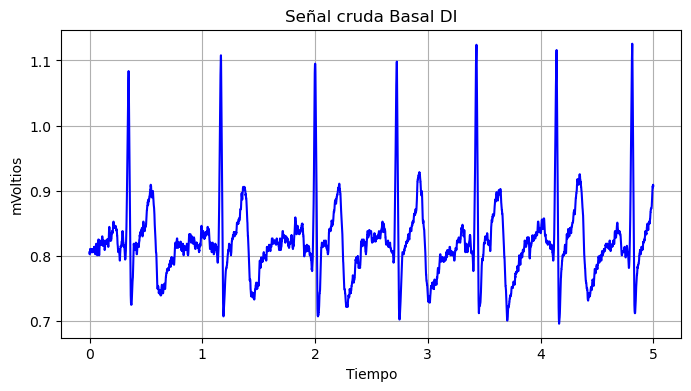

c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


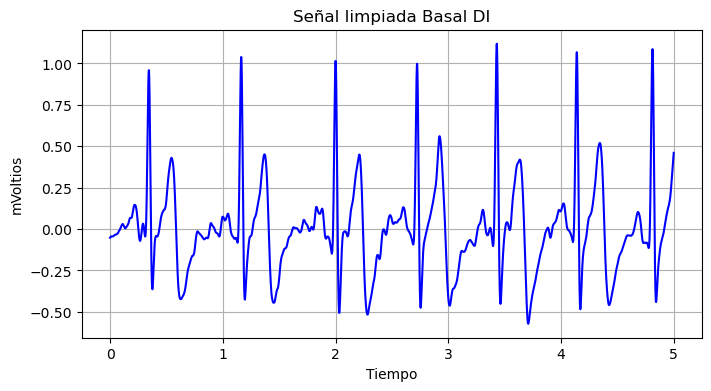

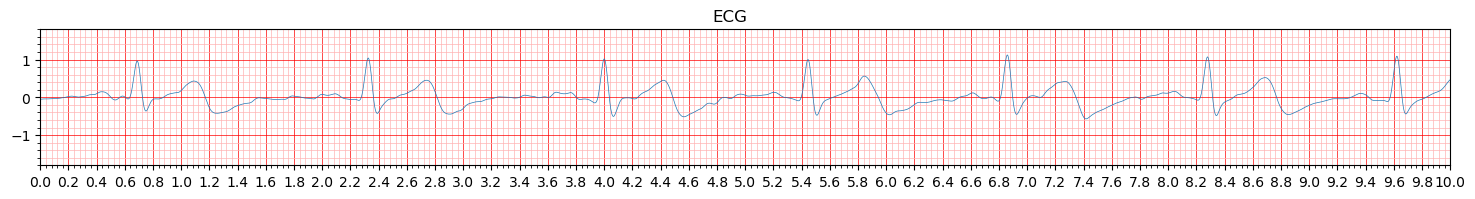

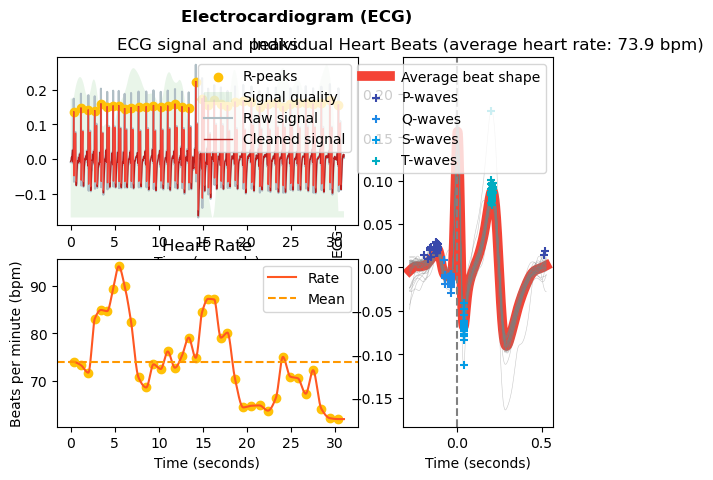

In [40]:
R1 = funcion_leer("basal/R1.txt")  # Carga la señal cruda desde un archivo
report, signals, info = procesar_ecg(R1,"Basal DI")

#### DII


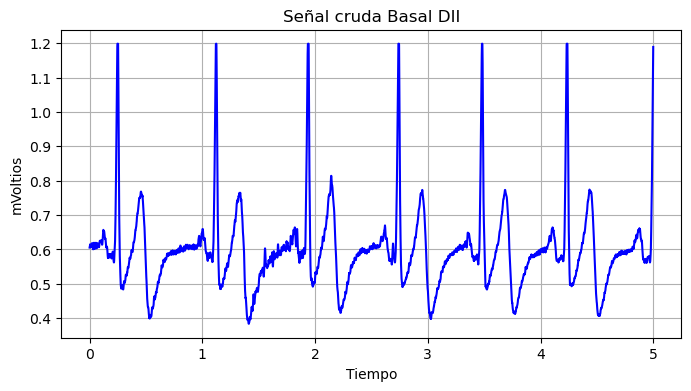

c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


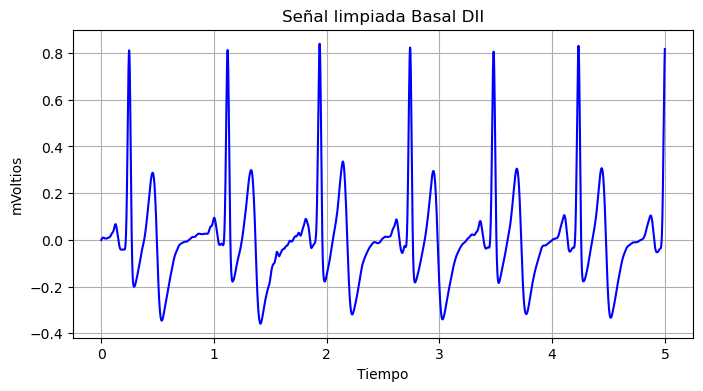

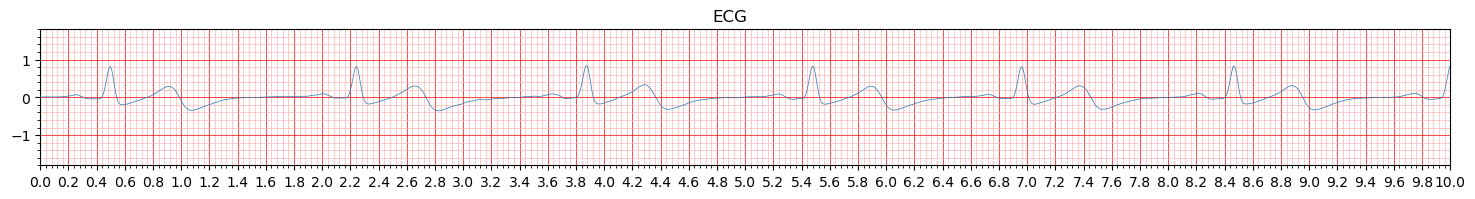

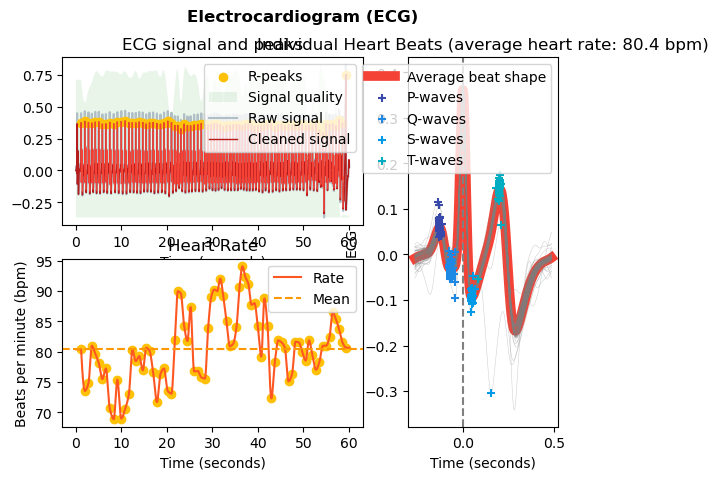

In [41]:
R2 = funcion_leer("basal/R2.txt")  # Carga la señal cruda desde un archivo
report, signals, info = procesar_ecg(R2,"Basal DII")

#### DIII


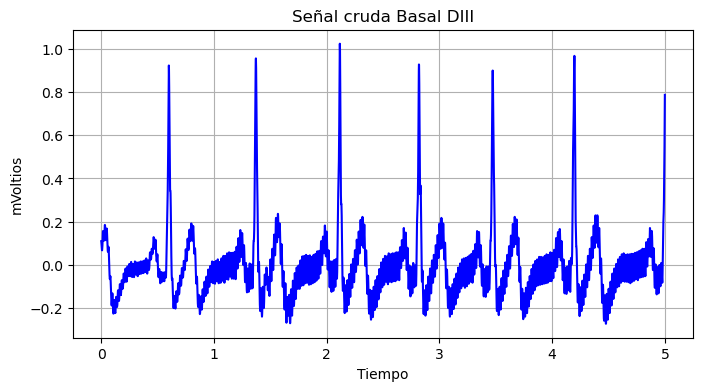

c:\Users\julio\Programas\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


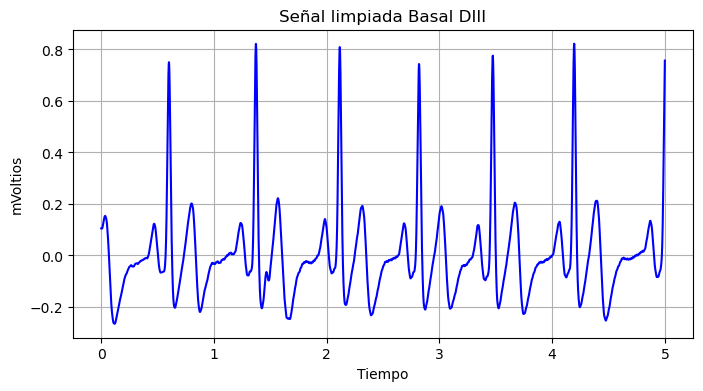

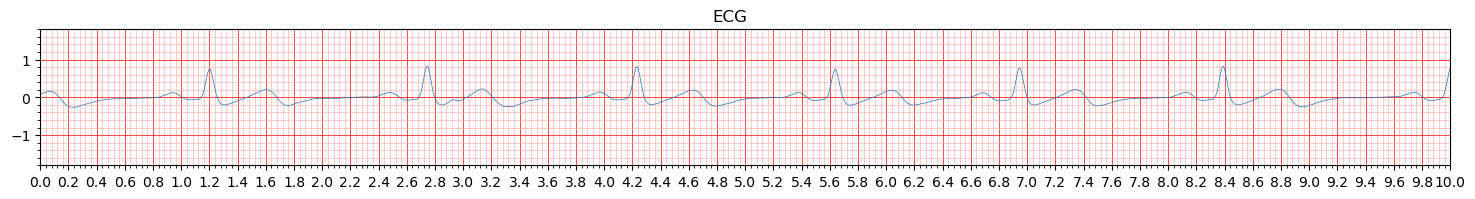

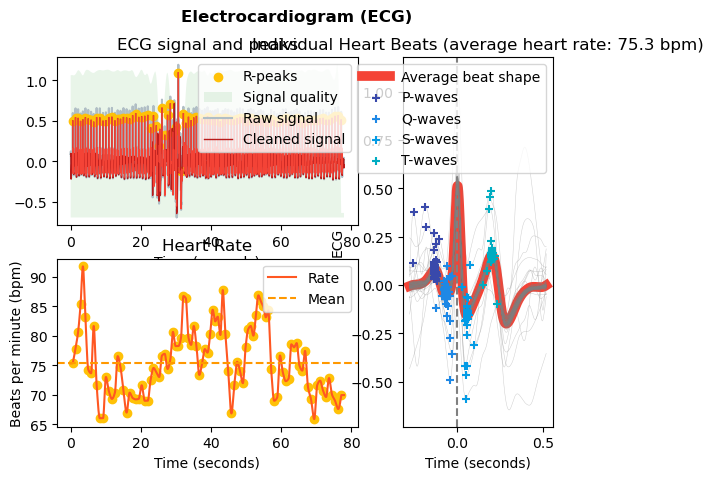

In [9]:
with open("basal/R3.txt","r") as basal_3:
    basal3 = obtener_dato_de_txt(basal_3)

#para convertir a mV
basal3_mv = convertir_a_mV(basal3)

report, signals, info = procesar_ecg(basal3_mv,"Basal DIII")


-  ### Aguntar la respiración 10 segundos

#### DI






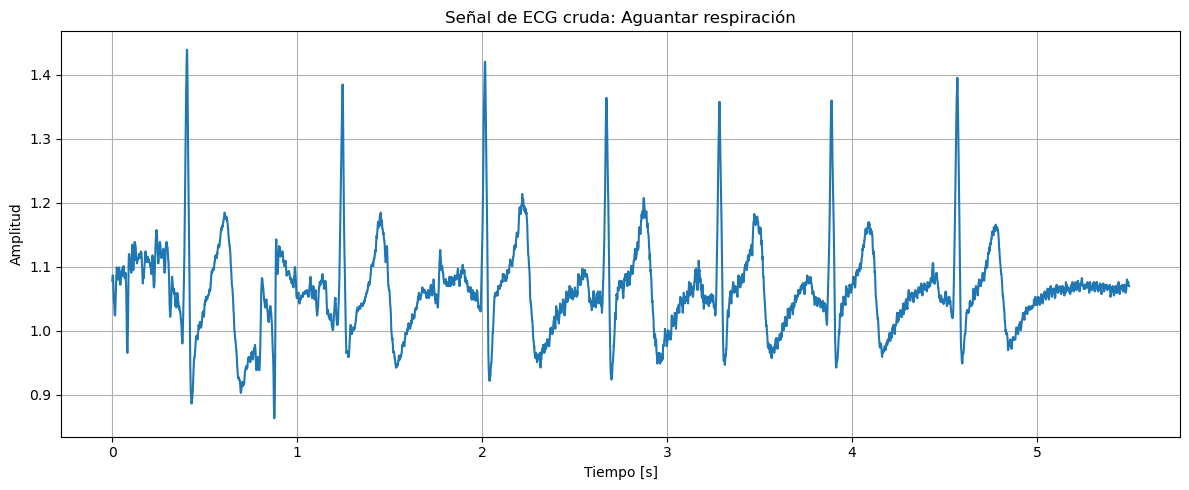

In [27]:
sample, amplitude = extraer_datos("mantener la respiración/derivada1.txt")
amplitude = amplitude*1.5/np.max(amplitude) #Primer escalamiento
grafica(sample[0:5500], amplitude[0:5500])

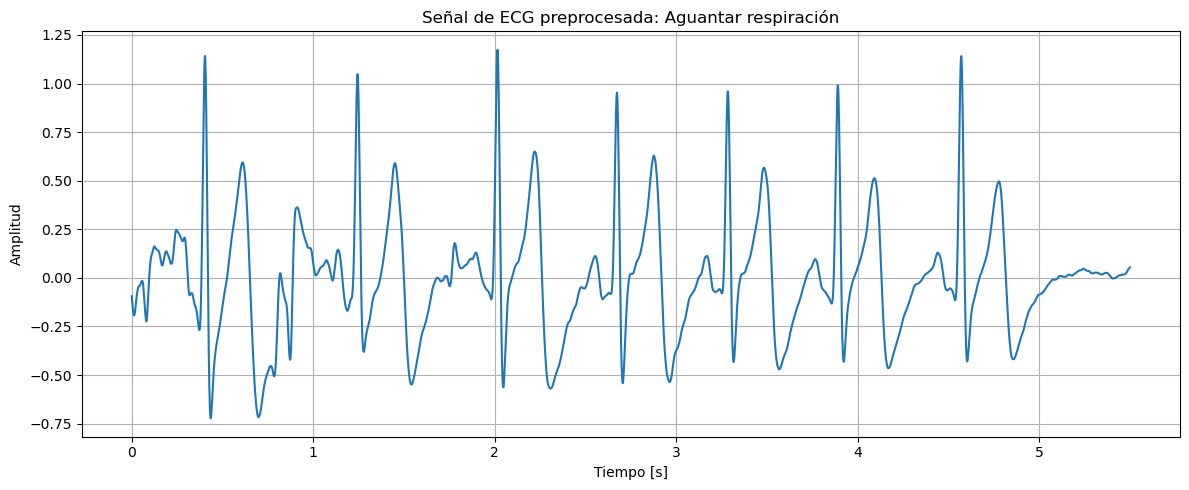

c:\Users\aleja\anaconda3\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Para la derivada 1 del estado basal, el ritmo cardiaco promedio es de: 74 bpm


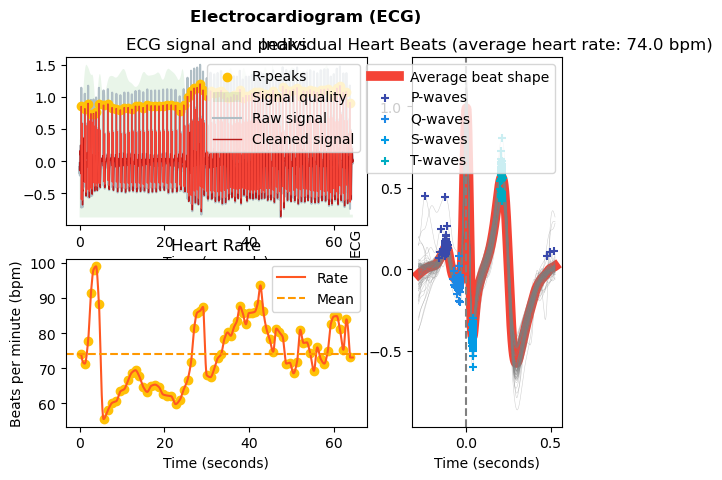

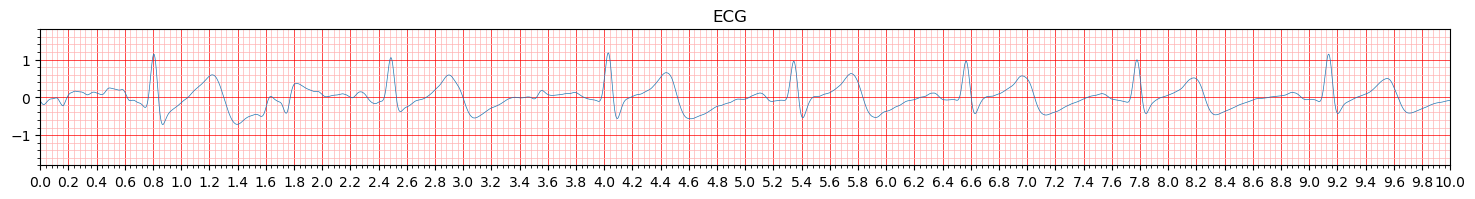

In [ ]:
i = ecg_procesamiento(sample, amplitude)



#### DII





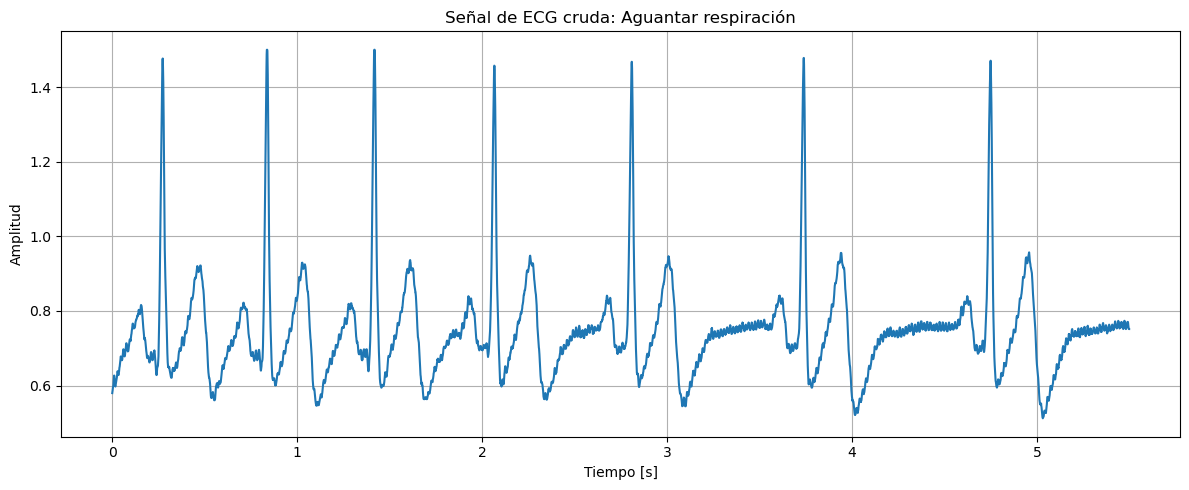

In [18]:
sample, amplitude = extraer_datos("mantener la respiración/derivada2.txt")
amplitude = amplitude*1.5/np.max(amplitude) #Primer escalamiento
grafica(sample[0:5500], amplitude[0:5500])

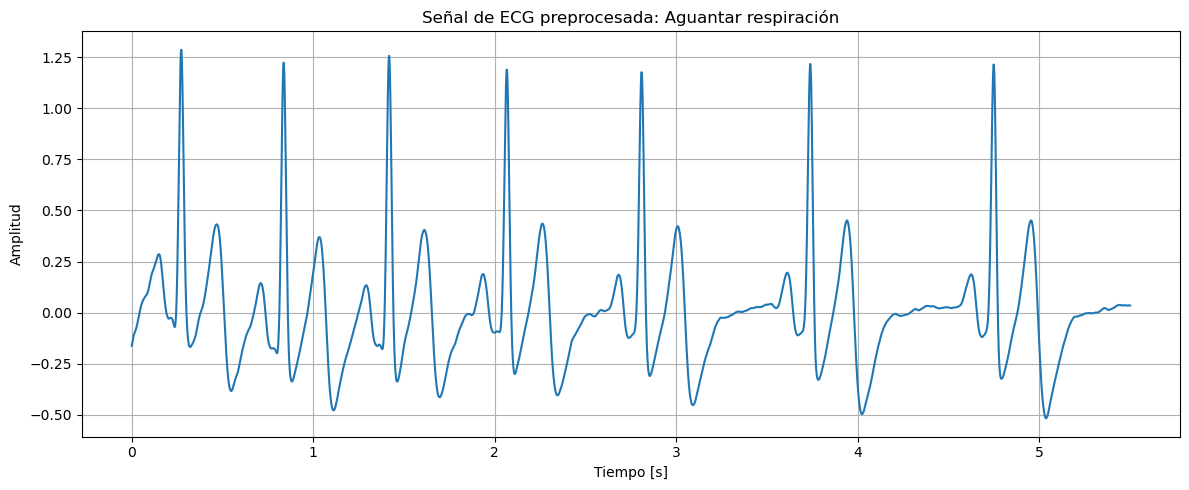

c:\Users\aleja\anaconda3\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Para la derivada 2 del estado basal, el ritmo cardiaco promedio es de: 73 bpm


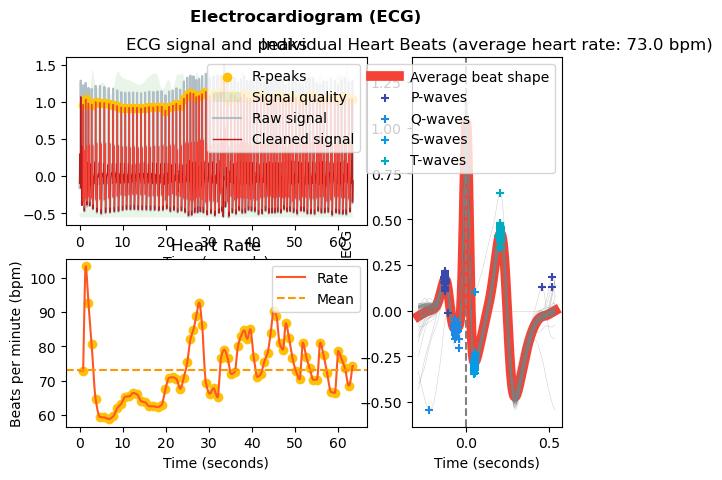

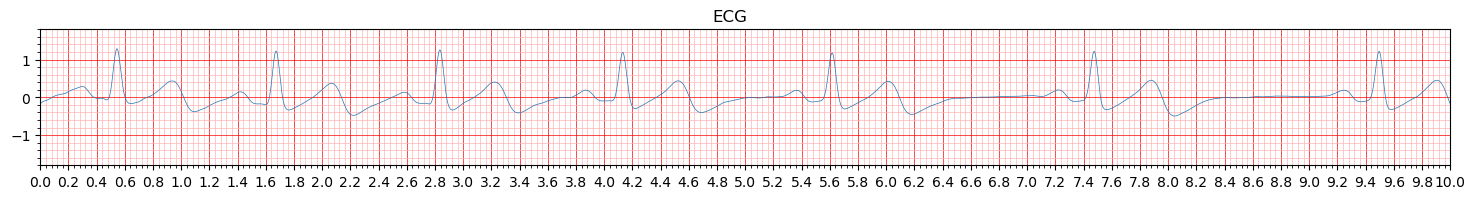

In [ ]:
i = ecg_procesamiento(sample, amplitude, i)

#### DIII  

-  ### Post ejercicio


#### DI







#### DII









#### DIII



## **Discusión**

### Derivada 1
<div align="left">
  <img src="imagenes/derivada1/derivada1_basal.png" width="45%" style="display: inline-block;">
  <img src="imagenes/derivada1/derivada1_respiracion.png" width="45%" style="display: inline-block;">

  <p style="text-align: center;"><strong>Figura X: Comparación de características entre primeras derivadas</strong></p>
</div>
<br>

Procederemos a discutir los resultados para la primera derivada del estado basal, aguantar la respiración y post-ejercicio, enfocandonos en tres aspectos particulares: bpm, las gráficas de HRV y finalmente la gráfica que nos muestra la forma promedio del latido, Vemos que para el estado basal y de aguantar la respiración, se obtuvieron valores de bpm prácticamente iguales.

## Bibliografía 

## Anexos  

### Función para leer datos Bitalino (Basal 1 y Basal 2)

In [5]:
# Función para leer el archivo de texto y extraer la señal de ECG
import pandas as pd
import numpy as np
def funcion_leer(nombre):
    # Leer el archivo
    with open(nombre, 'r') as file:
        # Saltar las líneas de encabezado hasta que termine el EndOfHeader
        while True:
            line = file.readline()
            if "EndOfHeader" in line:
                break
        
        # Cargar los datos en un DataFrame
        data = pd.read_csv(file, delimiter='\t', header=None)
        
    # Seleccionar solo la quinta columna (índice 4 ya que Python empieza desde 0)
    columna_5 = data.iloc[:, 5]
    # Convertir la columna a un array de NumPy
    array_np = np.array(columna_5)
    return array_np

### Función para leer datos Bitalino y convertir a mV (Basal 3)

In [3]:
import numpy as np
def convertir_a_mV(dato,N_bits=10,valor_minimo=-1.64,valor_máximo=1.64):
    llaves = list(range(0,2**N_bits))
    valores = np.linspace(valor_minimo, valor_máximo, len(llaves))
    dic_valores = dict(zip(llaves,valores))
    
    #para crear una lista directamente, con elementos 0
    data_convertido = np.zeros(len(dato))
    indice = 0
    for valor in dato:
        data_convertido[indice] = dic_valores.get(int(valor), 0)
        indice += 1
    return data_convertido


#Función para obtener datos del TXT
def obtener_dato_de_txt(archivo):
    datos = []
    marcador = False
    #empezar la lactura de los txt
    for linea in archivo: #por cada línea
        if marcador: #recién adjuntará datos al ser verdadero
            datos.append(linea.rstrip().split("\t")[5])
        elif linea.rstrip() == "# EndOfHeader":  #marcador será verdadero a partir la línea esa
            marcador = True
    return datos

### Función para plotear ECG y analizarla (Basal 1 y Basal 2)


In [8]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import ecg_plot


def procesar_ecg(signal_raw, nombre,sampling_rate=1000,max_voltage=1.5,rango1=0,rango2=5000):
    # Escalar la señal cruda al rango de 0 a 1.2 V
    signal_scaled = (signal_raw / max(signal_raw)) * 1.2
    plt.figure(figsize=(8,4))

    plt.plot((np.arange(len(signal_scaled))/1000)[rango1:rango2],signal_scaled[rango1:rango2],"b")
    plt.title(f"Señal cruda {nombre}")
    plt.xlabel("Tiempo")
    plt.ylabel("mVoltios")
    plt.grid()
    plt.show()

    # Limpiar la señal
    signal_cleaned = nk.ecg_clean(signal_scaled, sampling_rate=sampling_rate)

    # Verificar si la señal limpiada tiene longitud válida
    if len(signal_cleaned) > 0:
        # Procesar la señal
        signals, info = nk.ecg_process(signal_cleaned, sampling_rate=sampling_rate)
        
        # Analizar la señal
        report = nk.ecg_analyze(signals, sampling_rate=sampling_rate)

        # Escalar la señal limpiada a un nuevo voltaje máximo (1.5 V en este caso)
        signal_cleaned_scaled = (signal_cleaned / max(signal_cleaned)) * max_voltage
        plt.figure(figsize=(8,4))

        plt.plot((np.arange(len(signal_cleaned_scaled))/1000)[rango1:rango2],signal_cleaned_scaled[rango1:rango2],"b")
        plt.title(f"Señal limpiada {nombre}")
        plt.xlabel("Tiempo")
        plt.ylabel("mVoltios")
        plt.grid()
        plt.show()

        # Graficar la señal escalada y limpiada
        ecg_plot.plot_1(signal_cleaned_scaled[0:5000])
        nk.ecg_plot(signals, info)

        return report, signals, info
    else:
        print("Error: La señal limpiada está vacía. Revisa la señal original y el proceso de limpieza.")
        return None, None, None

### Funciones usadas para Respiracion1 y Respiracion2

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk
import ecg_plot

def extraer_datos(data):
    # Abrir el archivo de texto
    with open(data, "r") as f:
        # Saltar las tres primeras líneas
        next(f)
        next(f)
        next(f)
        
        # Leer todas las líneas restantes
        all_data = f.readlines()   
    
    # Procesar cada línea, dividiendo por tabulaciones
    all_data = [line.strip().split('\t') for line in all_data]
    
    # Extraer la primera columna (muestra)
    sample = [int(row[0]) for row in all_data]  # Primera columna

    # Crear una secuencia de números para la muestra (opcional, según tu lógica)
    sample = np.arange(0, len(sample))  # Reemplaza los valores por una secuencia 0, 1, 2, ..., n
    
    # Extraer la sexta columna (amplitud)
    amplitude = [int(row[5]) for row in all_data]  # Sexta columna (índice 5)
    amplitude = np.array(amplitude)
    return sample, amplitude  # Devolver los valores de la muestra y amplitud


def grafica(sample, amplitude):
    plt.figure(figsize=(12, 5))

    plt.plot(sample/1000, amplitude)
    plt.title('Señal de ECG cruda: Aguantar respiración')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.grid(True)
   
    plt.tight_layout()
    plt.show()


def ecg_procesamiento(sample, raw_signal, i=1):
    cleaned_signal = nk.ecg_clean(raw_signal, sampling_rate=1000)
    #Segundo escalamiento
    cleaned_signal = cleaned_signal*1.5/np.max(cleaned_signal)
    #Ploteo de señal filtrada
    grafica(sample[0:5500], cleaned_signal[0:5500])
    
    signals, info = nk.ecg_process(cleaned_signal, sampling_rate=1000)
    nk.ecg_plot(signals, info)

    # Realizar el análisis de la señal limpia
    results = nk.ecg_analyze(signals, sampling_rate=1000)
    x = results.iloc[0, 0]
    print("Para la derivada", i, "del estado basal, el ritmo cardiaco promedio es de:", round(x), "bpm")
    ecg_plot.plot_1(cleaned_signal[0:5000])

    i += 1 #Numerador de derivadas

    return i    